# Hate Speech Classification Model

In [ ]:
!pip install PySastrawi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!ls "input"

data.csv  new_kamusalay.csv


## Load Data

In [ ]:
data = pd.read_csv("./input/data.csv", encoding="latin-1")

alay_dict = pd.read_csv('./input/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 1: 'replacement'})


Text Data

In [ ]:
print("Shape: ", data.shape)
data.head()

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


Data Ratio

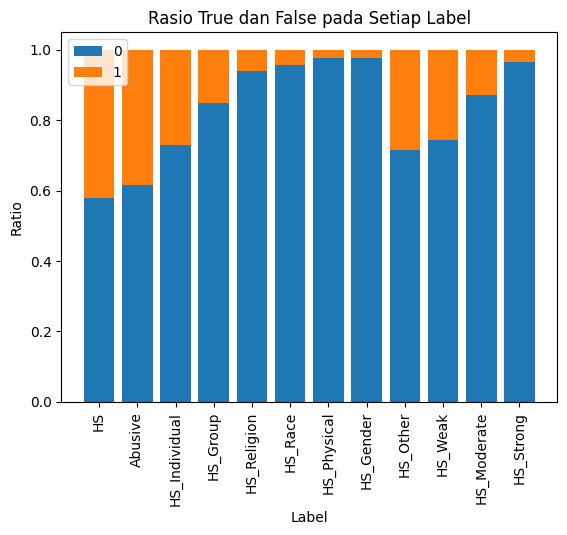

In [ ]:
data2 = data.drop("Tweet", axis=1)

true_counts = []
false_counts = []

for column in data2.columns:
  value_counts = data2[column].value_counts()
  count = data2[column].count()
  false_counts.append(value_counts[0]/count)
  true_counts.append(value_counts[1]/count)

plt.bar(data2.columns, false_counts, width=0.8)
plt.bar(data2.columns, true_counts, bottom=false_counts, width=0.8)

plt.xlabel("Label")
plt.xticks(rotation=90)
plt.ylabel("Ratio")
plt.legend(["0", "1"])
plt.title("Rasio True dan False pada Setiap Label")
plt.show()

In [ ]:
# Label selection
for i in data.columns:
    if i != "HS" and i != "Tweet":
        data = data.drop(labels=i, axis=1)

print("Shape: ", data.shape)
data.head()

Shape:  (13169, 2)


,Tweet,HS
0,- disaat semua cowok berusaha melacak perhatia...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1


Alay Dict

In [ ]:
print("Shape: ", alay_dict.shape)
alay_dict.head(5)

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


## Preprocessing

There are 5 steps in data preprocessing

1. Case folding all text,
2. Data cleaning by removing unnecessary characters such as re-tweet symbol (RT), username, URL, and punctuation,
3. Tokenization,
4. Stemming using PySastrawi,
5. Stopwords removal

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

factory = StemmerFactory()
stemmer = factory.create_stemmer()
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))

def casefolding(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) # Remove nonalphanumeric
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', ' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

def tokenizing(text):
    text = word_tokenize(text)
    return text

def stemming(text):
    normalized_text = []

    for word in text:
        if word in alay_dict_map:
          normalized_text.append(alay_dict_map[word])
        else:
          normalized_text.append(word)

    stemmed_text = []

    for word in normalized_text:
        stemmed_text.append(stemmer.stem(word))

    return " ".join(stemmed_text)

def remove_stopword(text):
    list_stopwords = stopwords.words('indonesian')
    text = ' '.join(['' if word in list_stopwords else word for word in text.split(' ')])

    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

def preprocess(data):
    data["Tweet"] = data['Tweet'].apply(casefolding)
    print(f"\nCasefolding Result: ")
    print(data.head())
    data["Tweet"] = data['Tweet'].apply(remove_unnecessary_char)
    print(f"\nRemove Unnecessary Character Result: ")
    print(data.head())
    data['Tweet'] = data['Tweet'].apply(tokenizing)
    print(f"\nTokenization Result: ")
    print(data.head())
    data['Tweet'] = data['Tweet'].apply(stemming)
    print(f"\nStemming Result: ")
    print(data.head())
    data['Tweet'] = data['Tweet'].apply(remove_stopword)
    print(f"\nStopwords Removal Result: ")
    print(data.head())
    return data["Tweet"]

data['Tweet'] = preprocess(data)
data.to_csv('preprocessed_indonesian_hate_speech_tweet.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Casefolding Result: 
                                               Tweet  HS
0  - disaat semua cowok berusaha melacak perhatia...   1
1  rt user: user siapa yang telat ngasih tau elu?...   0
2  41. kadang aku berfikir, kenapa aku tetap perc...   0
3  user user aku itu aku\n\nku tau matamu sipit t...   0
4  user user kaum cebong kapir udah keliatan dong...   1

Remove Unnecessary Character Result: 
                                               Tweet  HS
0   disaat semua cowok berusaha melacak perhatian...   1
1   siapa yang telat ngasih tau elu edan sarap gu...   0
2  41 kadang aku berfikir kenapa aku tetap percay...   0
3   aku itu aku n nku tau matamu sipit tapi dilia...   0
4   kaum cebong kapir udah keliatan dongoknya dar...   1

Tokenization Result: 
                                               Tweet  HS
0  [disaat, semua, cowok, berusaha, melacak, perh...   1
1  [siapa, yang, telat, ngasih, tau, elu, edan, s...   0
2  [41, kadang, aku, berfikir, kenapa, aku, tetap...   0
3  [

In [ ]:
data_clean = pd.read_csv("./preprocessed_indonesian_hate_speech_tweet.csv")
data_clean.head(5)

,Tweet,HS
0,cowok usaha lacak perhati gue lantas remeh per...,1
1,telat tau edan sarap gue gaul cigax jifla cal ...,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0
3,ku tau mata sipit lihat,0
4,kaum cebong kafir lihat dongok dungu haha,1


## Feature Extraction

In [ ]:
data_clean = data_clean.astype({ "HS": "category" })
data_clean = data_clean.astype({ "Tweet": "string" })

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean["Tweet"].astype('U'))

# Output tfidf result
# Get feature names
feature_names = tf.get_feature_names_out()

# Get TF-IDF values for each feature
tfidf_values = text_tf.toarray()

# Create a DataFrame to store the results
tfidf_df = pd.DataFrame(data=tfidf_values, columns=feature_names)

print(tfidf_df)

        00  000  00wib   01   02  021   03  031   04   05  ...   zu  zuhair  \
0      0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0   
1      0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0   
2      0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0   
3      0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0   
4      0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0   
...    ...  ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...   
13164  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0   
13165  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0   
13166  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0   
13167  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0   
13168  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0     0.0   

       zuhud  zul  zulkarnain  zulkifli  zumi  zumi

In [ ]:
# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean["HS"], test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)  # Shape of the feature matrix for training data
print("X_test shape:", X_test.shape)    # Shape of the feature matrix for testing data
print("y_train shape:", y_train.shape)  # Shape of the target variable for training data
print("y_test shape:", y_test.shape)    # Shape of the target variable for testing data

X_train shape: (10535, 13240)
X_test shape: (2634, 13240)
y_train shape: (10535,)
y_test shape: (2634,)


## SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

c_params = [0.1, 1, 10, 100, 1000]
kernel_params = ["linear", "poly", "rbf"]

trial_number = 0
accuracies = []
recalls = []
specificities = []
search_data = []

for c_param in c_params:
  for kernel_param in kernel_params:
    trial_number+=1
    clf = svm.SVC(C=c_param, kernel=kernel_param)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)

    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    specificity = tn / (tn+fp)

    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)
    search_data.append(str(c_param) + "-" + kernel_param)
    print(trial_number, "Parameters:","C:", c_param, "kernel:", kernel_param,  "-", "Accuracy:", accuracy, "Recall", recall, "Specificity:", specificity)


1 Parameters: C: 0.1 kernel: linear - Accuracy: 0.7851176917236142 Recall 0.556350626118068 Specificity: 0.9538258575197889
2 Parameters: C: 0.1 kernel: poly - Accuracy: 0.5812452543659833 Recall 0.014311270125223614 Specificity: 0.9993403693931399
3 Parameters: C: 0.1 kernel: rbf - Accuracy: 0.6788154897494305 Recall 0.2701252236135957 Specificity: 0.9802110817941952
4 Parameters: C: 1 kernel: linear - Accuracy: 0.8314350797266514 Recall 0.7602862254025045 Specificity: 0.8839050131926122
5 Parameters: C: 1 kernel: poly - Accuracy: 0.7524677296886864 Recall 0.47584973166368516 Specificity: 0.9564643799472295
6 Parameters: C: 1 kernel: rbf - Accuracy: 0.8394077448747153 Recall 0.7334525939177102 Specificity: 0.9175461741424802
7 Parameters: C: 10 kernel: linear - Accuracy: 0.8071374335611238 Recall 0.7504472271914132 Specificity: 0.8489445910290238
8 Parameters: C: 10 kernel: poly - Accuracy: 0.7627182991647684 Recall 0.5134168157423972 Specificity: 0.9465699208443272
9 Parameters: C: 1

Hyperparameter Plot

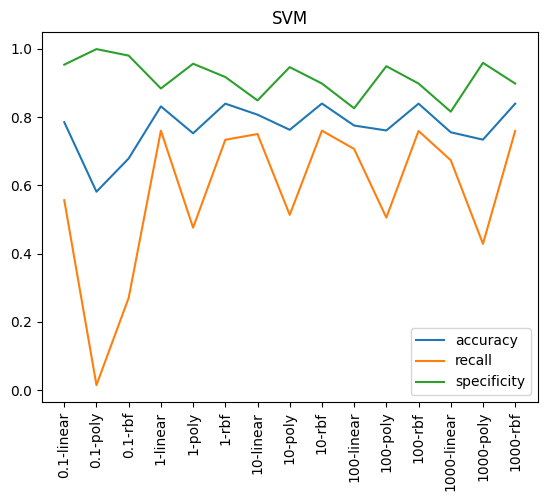

In [ ]:
plt.title("SVM")
plt.plot(search_data, accuracies)

plt.plot(search_data, recalls)

plt.plot(search_data, specificities)

plt.xticks(rotation=90)
plt.legend(["accuracy", "recall", "specificity"])
plt.show()

Test on New Tweet

In [ ]:
clf = svm.SVC(C=10, kernel="rbf")

clf.fit(X_train, y_train)

new_tweet = [
    "saya sangat suka kerjanya, beliau baik hati dan tidak sombong",
    "setuju saja jika memang masalahnya seperti itu. saya percaya presiden",
    "anjing babi bangsat kau, kerja tidak becus"
]

new_tweet = preprocess(pd.DataFrame({ "Tweet": new_tweet }))
text_tf = tf.transform(new_tweet)

evaluate = clf.predict(text_tf)

print(evaluate)


Casefolding Result: 
                                               Tweet
0  saya sangat suka kerjanya, beliau baik hati da...
1  setuju saja jika memang masalahnya seperti itu...
2         anjing babi bangsat kau, kerja tidak becus

Remove Unnecessary Character Result: 
                                               Tweet
0  saya sangat suka kerjanya beliau baik hati dan...
1  setuju saja jika memang masalahnya sepe i itu ...
2          anjing babi bangsat kau kerja tidak becus

Tokenization Result: 
                                               Tweet
0  [saya, sangat, suka, kerjanya, beliau, baik, h...
1  [setuju, saja, jika, memang, masalahnya, sepe,...
2  [anjing, babi, bangsat, kau, kerja, tidak, becus]

Stemming Result: 
                                               Tweet
0  saya sangat suka kerja beliau baik hati dan ti...
1  tuju saja jika memang masalah sepe i itu saya ...
2         anjing babi bangsat kamu kerja tidak becus

Stopwords Removal Result: 
                     

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

trial_number = 0
tree_numbers = [100, 200, 300, 400, 500]
accuracies = []
recalls = []
specificities = []

for tree_number in tree_numbers:
  trial_number+=1
  rf = RandomForestClassifier(n_estimators=tree_number)
  rf.fit(X_train, y_train)
  y_predict = rf.predict(X_test)

  accuracy = accuracy_score(y_test, y_predict)
  recall = recall_score(y_test, y_predict)

  tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
  specificity = tn / (tn+fp)

  accuracies.append(accuracy)
  recalls.append(recall)
  specificities.append(specificity)
  print(trial_number, "Parameters:","Number of trees:", tree_number, "-", "Accuracy:", accuracy, "Recall", recall, "Specificity:", specificity)

1 Parameters: Number of trees: 100 - Accuracy: 0.8409263477600607 Recall 0.7683363148479427 Specificity: 0.8944591029023746
2 Parameters: Number of trees: 200 - Accuracy: 0.8397873955960516 Recall 0.7620751341681574 Specificity: 0.8970976253298153
3 Parameters: Number of trees: 300 - Accuracy: 0.8424449506454063 Recall 0.7656529516994633 Specificity: 0.8990765171503958
4 Parameters: Number of trees: 400 - Accuracy: 0.8439635535307517 Recall 0.7719141323792487 Specificity: 0.8970976253298153
5 Parameters: Number of trees: 500 - Accuracy: 0.8428246013667426 Recall 0.7692307692307693 Specificity: 0.8970976253298153


Hyperparameter Plot

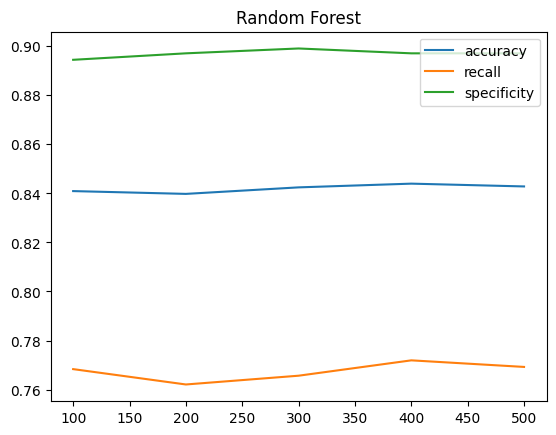

In [ ]:
plt.title("Random Forest")
plt.plot(tree_numbers, accuracies)

plt.plot(tree_numbers, recalls)

plt.plot(tree_numbers, specificities)

plt.legend(["accuracy", "recall", "specificity"])
plt.show()

Test on New Tweet

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train, y_train)

new_tweet = [
    "saya sangat suka kerjanya, beliau baik hati dan tidak sombong",
    "setuju saja jika memang masalahnya seperti itu. saya percaya presiden",
    "anjing babi bangsat kau, kerja tidak becus"
]

new_tweet = preprocess(pd.DataFrame({ "Tweet": new_tweet }))
text_tf = tf.transform(new_tweet)

evaluate = rf.predict(text_tf)

print(evaluate)


Casefolding Result: 
                                               Tweet
0  saya sangat suka kerjanya, beliau baik hati da...
1  setuju saja jika memang masalahnya seperti itu...
2         anjing babi bangsat kau, kerja tidak becus

Remove Unnecessary Character Result: 
                                               Tweet
0  saya sangat suka kerjanya beliau baik hati dan...
1  setuju saja jika memang masalahnya sepe i itu ...
2          anjing babi bangsat kau kerja tidak becus

Tokenization Result: 
                                               Tweet
0  [saya, sangat, suka, kerjanya, beliau, baik, h...
1  [setuju, saja, jika, memang, masalahnya, sepe,...
2  [anjing, babi, bangsat, kau, kerja, tidak, becus]

Stemming Result: 
                                               Tweet
0  saya sangat suka kerja beliau baik hati dan ti...
1  tuju saja jika memang masalah sepe i itu saya ...
2         anjing babi bangsat kamu kerja tidak becus

Stopwords Removal Result: 
                     

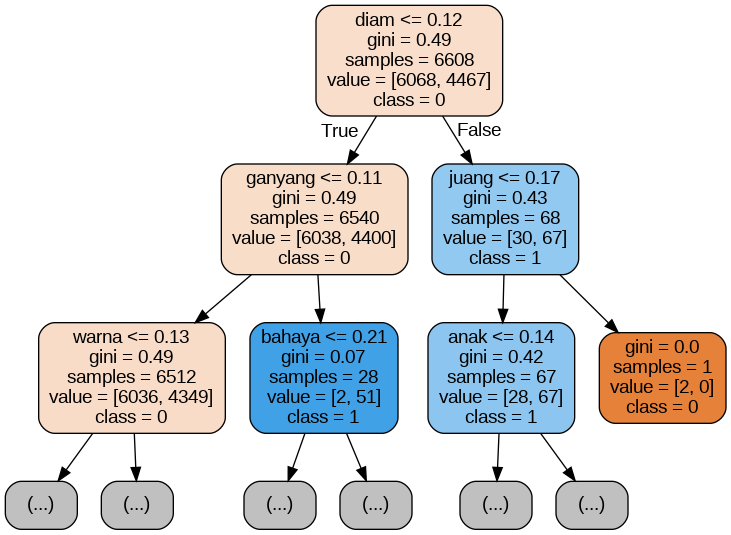

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import display
from graphviz import Source

# Visualising Tree
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_names,
                               class_names=['0', '1'],
                               filled=True,
                               max_depth=2,
                               impurity=True,
                               rounded = True,
                               proportion = False,
                               precision = 2)
    graph = Source(str(dot_data))
    graph.render(filename=f'tree_{i}', format='png')  # Saves the tree as an image file

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_1.png')

## Save Model

Based on the training and testing result, Random Forest model outperform SVM model. So Random Forest model will be implemented in the social media prototype.

In [ ]:
import joblib

joblib.dump(rf, "model_rf.pkl")

['model_rf.pkl']